# Testing of ANN models for combustion

Simple tests for the generated ANN models are made possible on python. These include:

+ Test on 0D ignition simulations
+ Test on the prediction of reaction rate of stationary 1D flames (*a priori* testing)

In [3]:
from ai_reacting_flows.ann_model_generation.model_testing import ModelTesting

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Dictionary with parameters
testing_parameters = {}

testing_parameters["models_folder"] = "./MODEL_TEST"

testing_parameters["fuel"] = "H2"
testing_parameters["mechanism"] = "/work/mehlc/2_IA_KINETICS/ai_reacting_flows/data/chemical_mechanisms/mech_H2.cti"

testing_parameters["spec_to_plot"] = ["N2", "OH", "O2", "O", "H2", "H2O2"]
testing_parameters["pv_species"] = ["H2O"]


In [6]:
test = ModelTesting(testing_parameters)

>> 3 models were found
   >> Clustering method kmeans is used 


 ----------CLUSTER MODEL 0---------- 

Model: "main_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 dense_layer_1 (Dense)       (None, 19)                190       
                                                                 
 dense_layer_2 (Dense)       (None, 20)                400       
                                                                 
 output_layer (Dense)        (None, 8)                 168       
                                                                 
Total params: 758
Trainable params: 758
Non-trainable params: 0
_________________________________________________________________

 ----------CLUSTER MODEL 1---------- 

Model: "main_model"
__________________________

2022-09-01 17:20:02.757288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 17:20:02.757832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCC/10.3.0/OpenMPI/4.1.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/PMIx/3.2.3/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libfabric/1.12.1/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/UCX/1.10.0/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/libevent/2.1.12/lib:/soft/irsrvsoft1/expl/eb/centos_7/software/Compiler/GCCcore/10.3.0/hwloc/2.4.1/lib:/soft/irsrvsoft1/expl/eb/cent

 dense_layer_1 (Dense)       (None, 9)                 90        
                                                                 
 dense_layer_2 (Dense)       (None, 10)                100       
                                                                 
 output_layer (Dense)        (None, 8)                 88        
                                                                 
Total params: 278
Trainable params: 278
Non-trainable params: 0
_________________________________________________________________

 ----------CLUSTER MODEL 2---------- 

Model: "main_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 dense_layer_1 (Dense)       (None, 9)                 90        
                                                                 
 dense_layer_2 (De

We can test the ability of the ANN model to reproduce the ignition of a homogeneous 0-D mixture. The mixture initial state is defined by its temperature $T_0$, its pressure $p$ and its equivalence ratio $\phi$. The simulation is here advanced in time using (i) the CVODE algorithm from CANTERA; (ii) the ANN model.

Current point in cluster: 2 

1/1 [==============================] - 0s 16ms/step

Error on equilibrium flame temperature is: 1.043643033791339e-06 % 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/ai_reacting_flows/ann_model_generation/model_testing.py:273: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axs3[0,0].set_ylim([atomic_cons[0,0]*ratio_scale_down,atomic_cons[0,0]*ratio_scale_up])


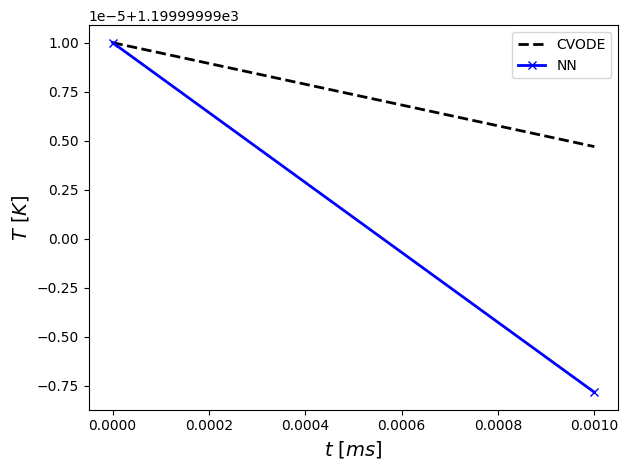

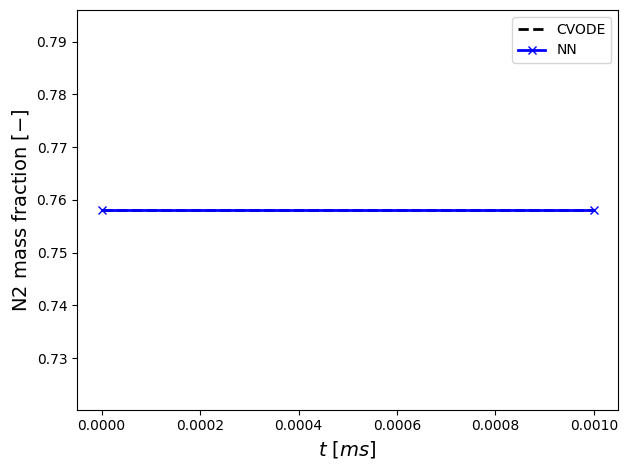

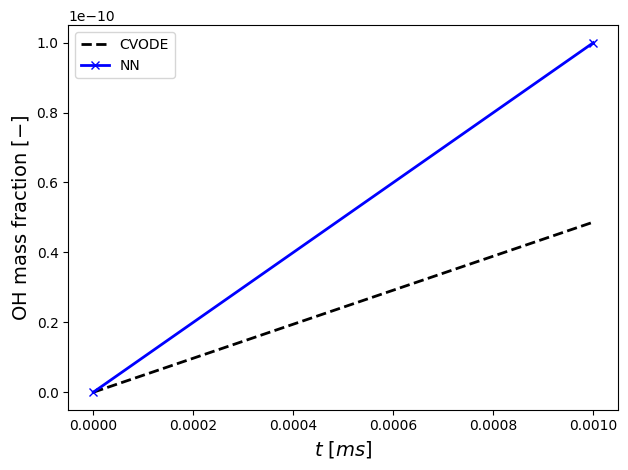

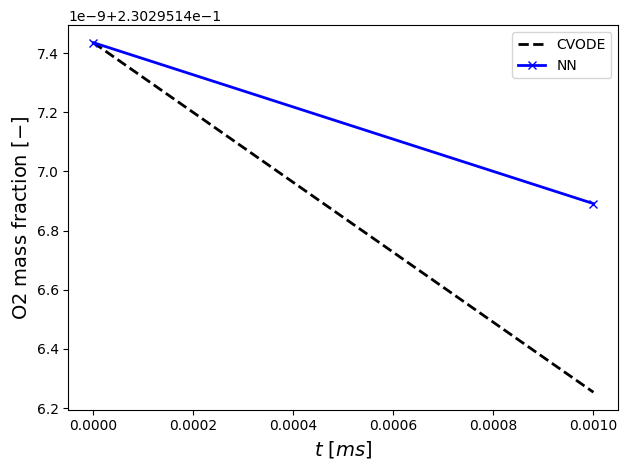

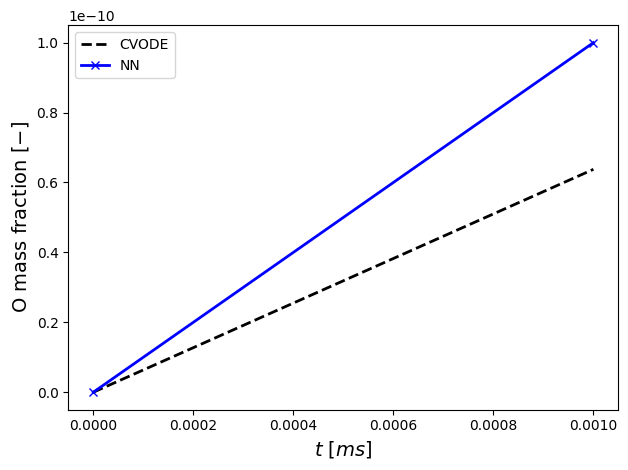

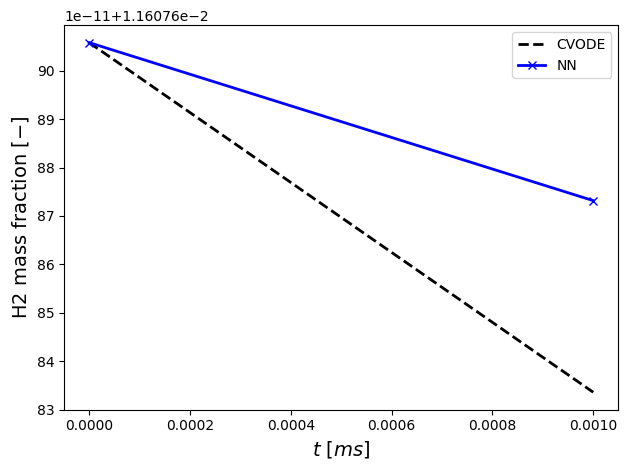

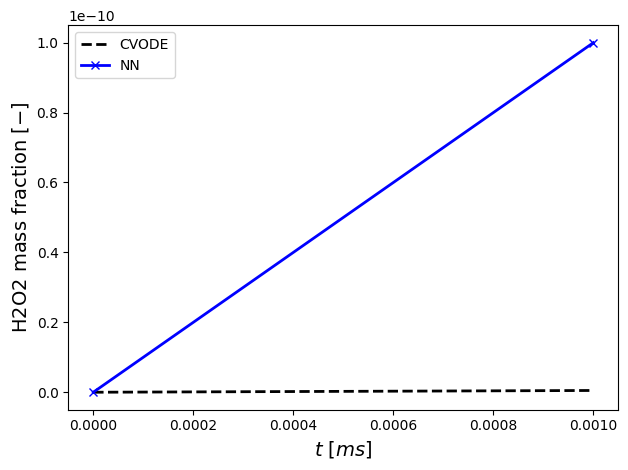

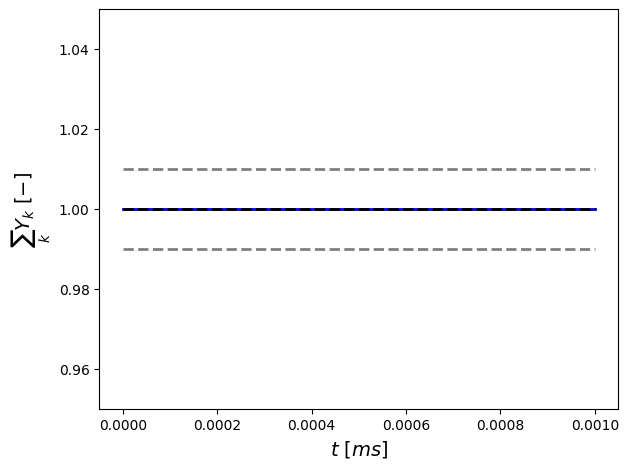

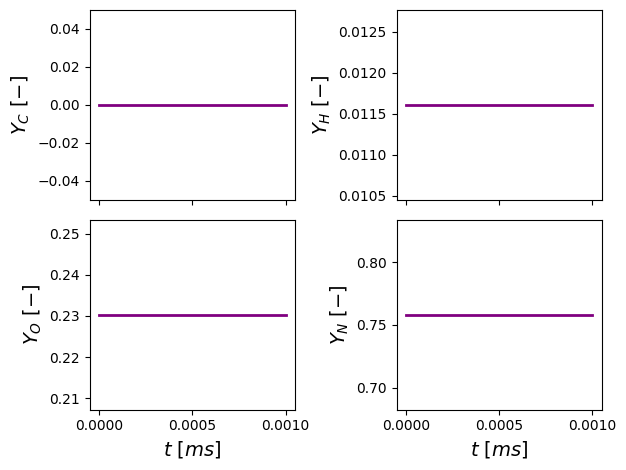

In [9]:
phi = 0.4
T0 = 1200.0
pressure = 101325.0
dt = 1.0e-6
nb_ite = 1

test.test_0D_ignition(phi, T0, pressure, dt, nb_ite)

Another test, if the ANN has been built for that, is to assess its ability to reproduce laminar premixed flames. The test here is *a priori*, in the sense that we take a CANTERA converged solution, and compare the exact reaction rate to the ANN reaction rate. For a species $k$, if the exact solution is written $Y_k$, the local reaction rate is estimated as:

$$ \dot{\omega}_k = \frac{Y_k(dt) - Y_k}{dt} $$

where $Y_k(dt)$ is the solution Y_k advanced by a time increment $dt$, estimated using either CVODE or ANN.

Computing Cantera 1D flame with T0 = 300.0 K and phi = 0.4
Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current point in cluster: 0 

Current poi

/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 23ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 19ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 23ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 24ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 20ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 



/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 16ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step
Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Current point in cluster: 0 

1/1 [==============================] - 0s 17ms/step


/work/mehlc/2_IA_KINETICS/ai_reacting_flows/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


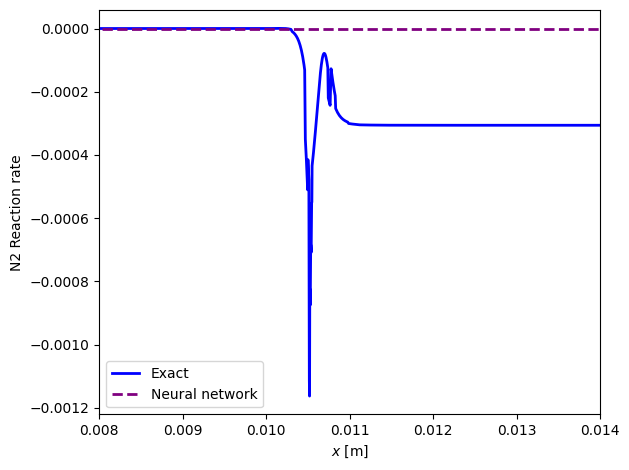

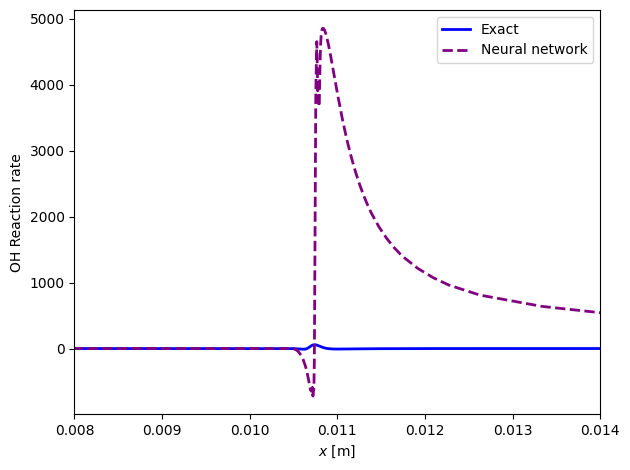

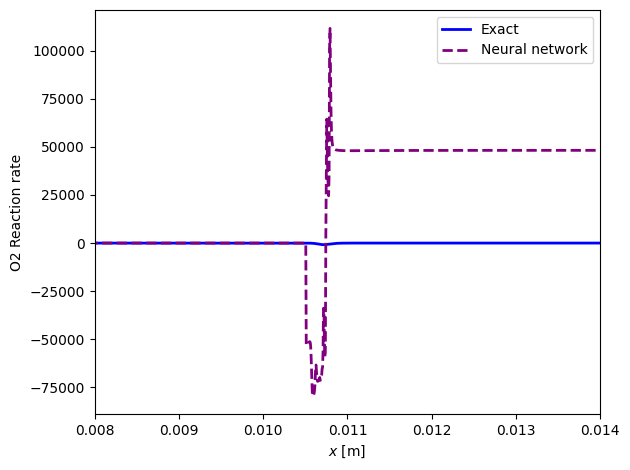

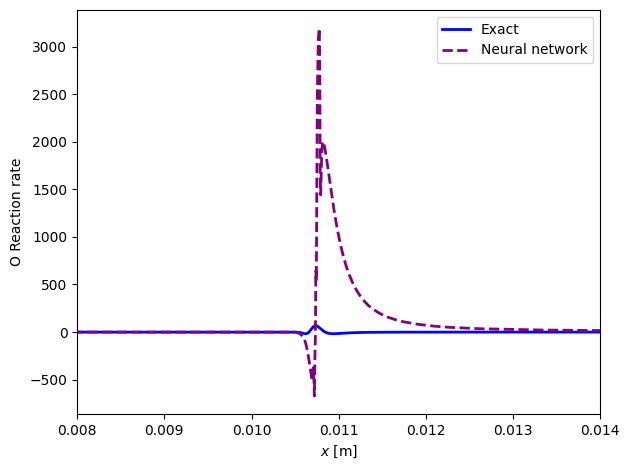

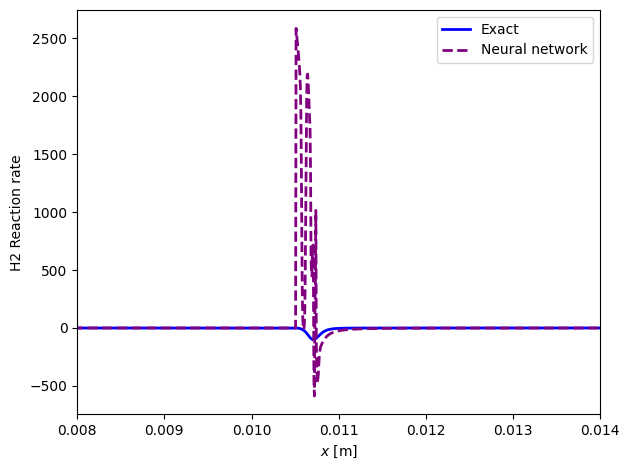

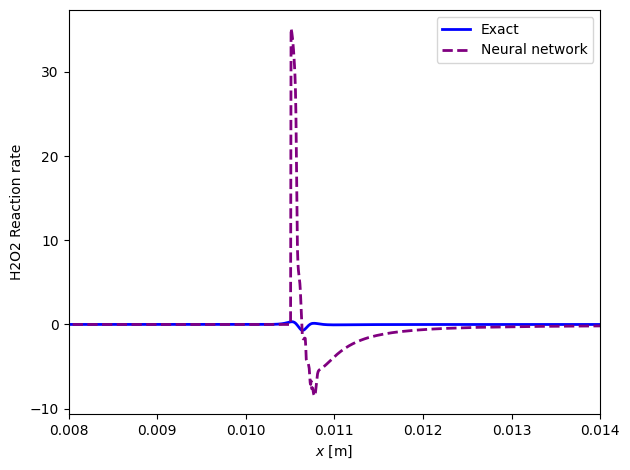

In [10]:
phi = 0.4
T0 = 300.0
pressure = 101325.0
dt = 1.0e-6
T_threshold = 600.0

test.test_1D_premixed(phi, T0, pressure, dt, T_threshold)